# Airplane Crashes Investigation
![](Data/Apc/mayday.jpg)

In [4]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

apc = pd.read_csv('Data/Apc/apc.csv')

Check the number of records in the dataset and take a sample record to inspect.

In [260]:
len(apc)

5268

In [422]:
apc.sample(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Weekday,Hour,fr,cluster,desc
3637,1986-08-28,06:53,"Texarkana, Arkansas",Southwest Airlift,NaN,Little Rock - Texarkana,Howard 250,N252K,2596,2.0,2.0,0.0,"On takeoff the cargo plane pitched up, rolled inverted and crashed. Improperly loaded. Alcohol impairment of the pilot and co-pilot.",1986,Thursday,6.0,1.0,53,center plane crashed gravity aft weight improperly control aircraft


In [262]:
apc.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

## Data Cleaning

* Convert Dates to datetime 
* Add a new column for the year
* Add a new column for the Weekday
* Add a new column for the Hour
* Add a column with the ratio of fatalities per passengers aboard (fr)
* Remove military flights (we are not interested)

In [263]:
# Convert Date, add Year, Weekday and Hour columns
import calendar
apc['Date'] = pd.to_datetime(apc['Date'])
apc['Year'] = apc['Date'].map(lambda x:x.year)
apc['Weekday'] = apc['Date'].map(lambda x:x.weekday_name)
apc['Hour'] = pd.to_datetime(apc['Time'], format='%H:%M',errors='coerce').dt.hour

In [264]:
# Add column with ratio of fatalities per passengers aboard
apc['fr']=apc['Fatalities']/apc['Aboard']

In [265]:
# Remove Military Flights because we are not interested in them
# First remove null Operators
apc.dropna(subset=['Operator'],inplace=True)
apc = apc[-apc['Operator'].str.contains("Military")]

## Number of Crashes per Year

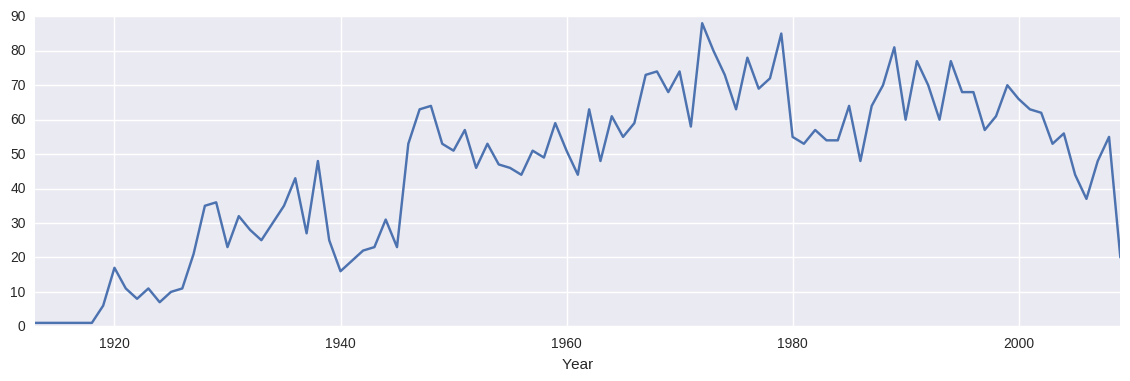

In [266]:
# Number of crashes per year
apc.groupby('Year').count()['Operator'].plot(figsize=(14,4));

## Number of Fatalities per Year

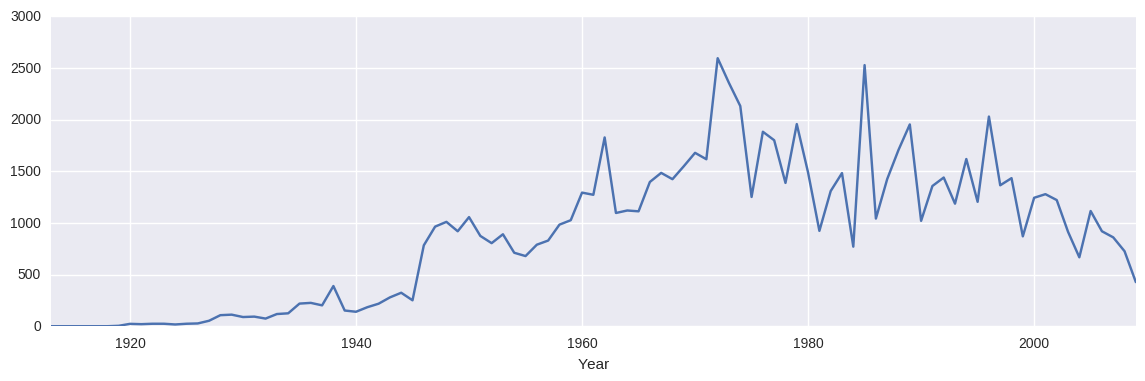

In [267]:
# List of Fatalities by Year
apc.groupby('Year').sum()['Fatalities'].plot(figsize=(14,4));

## Time of day when Crashes Occur
This might be just the most common time for flights, we don't have data for normal flights to compare.

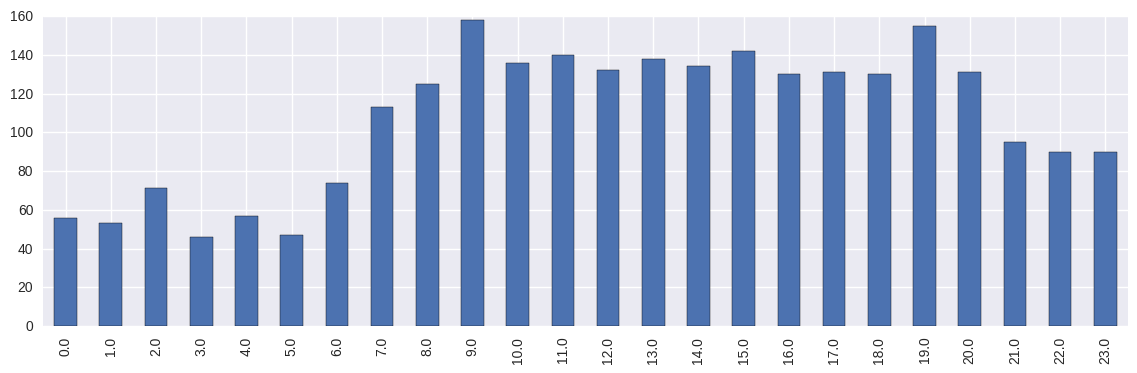

In [268]:
# Most common time for crashes (maybe this is just more common time for flights!)
apc['Hour'].value_counts().sort_index().plot(kind='bar',figsize=(14,4));

## Number of Crashes by Operator

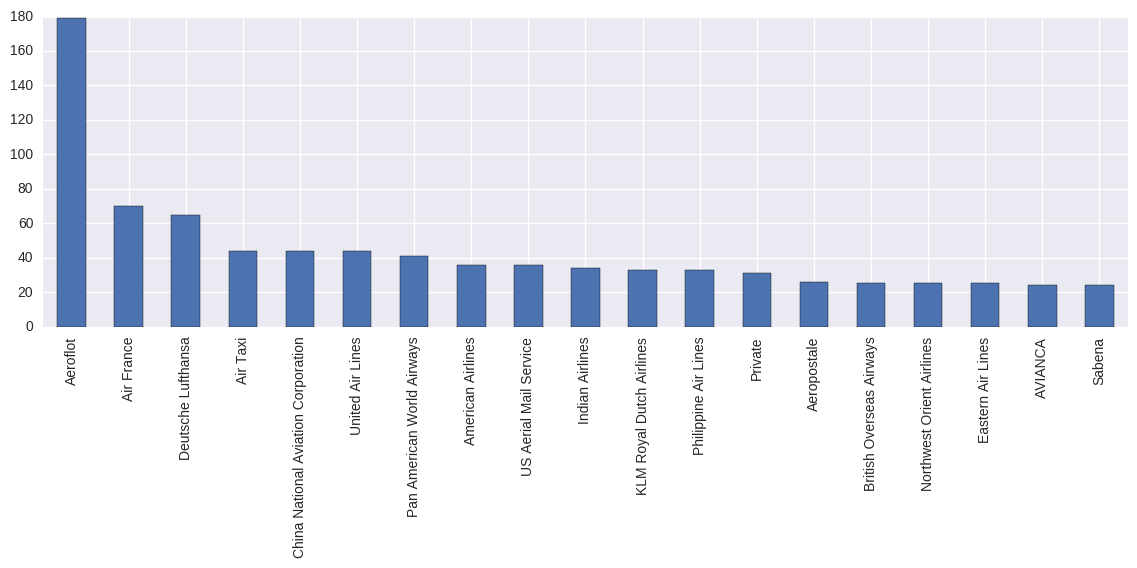

In [269]:
# Number of crashes by operator
apc['Operator'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));

## Number of Fatalities per Operator

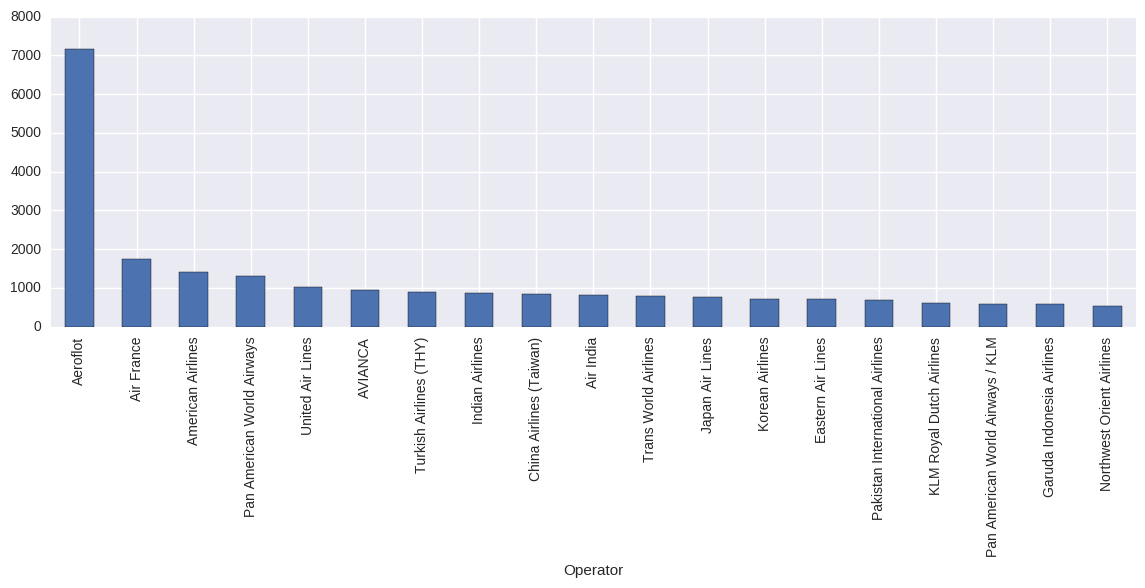

In [270]:
# Number of fatalities by operator
apc.groupby('Operator').sum()['Fatalities'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

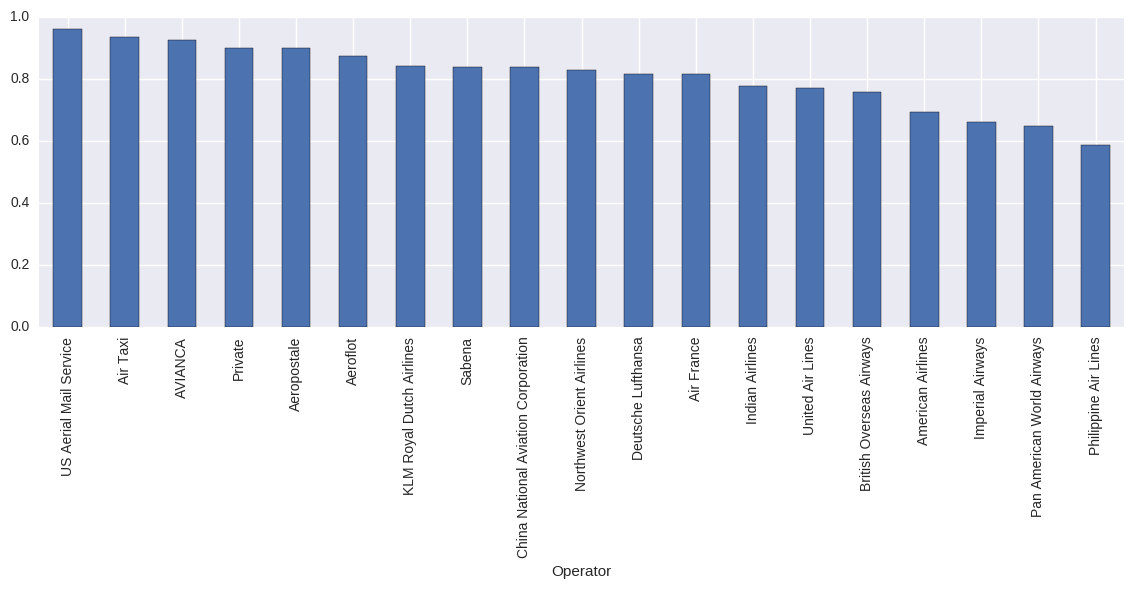

In [271]:
# Fatalities based on number of people aboard (for operators with 10 or more crashes)
fr = apc.groupby('Operator').agg(['mean','count'])
fr.loc[fr[('fr','count')]>20][('fr','mean')].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

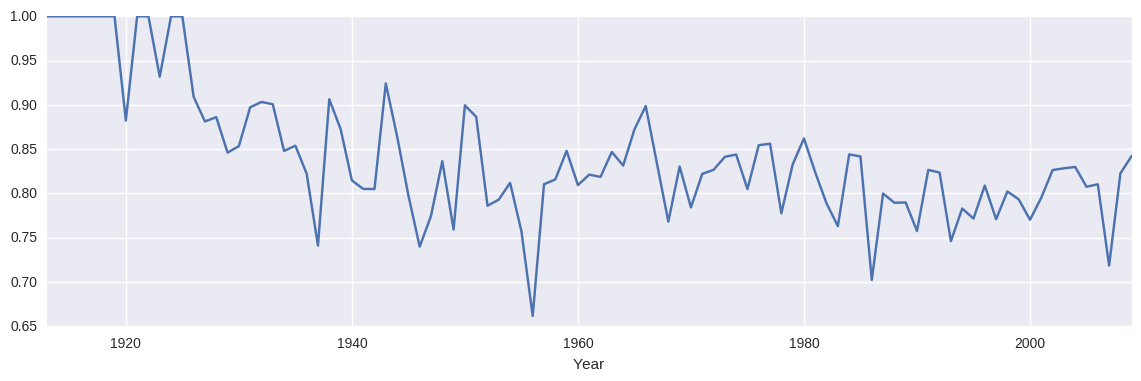

In [272]:
# Fatality Rate per Year
apc.groupby('Year').mean()['fr'].plot(figsize=(14,4));

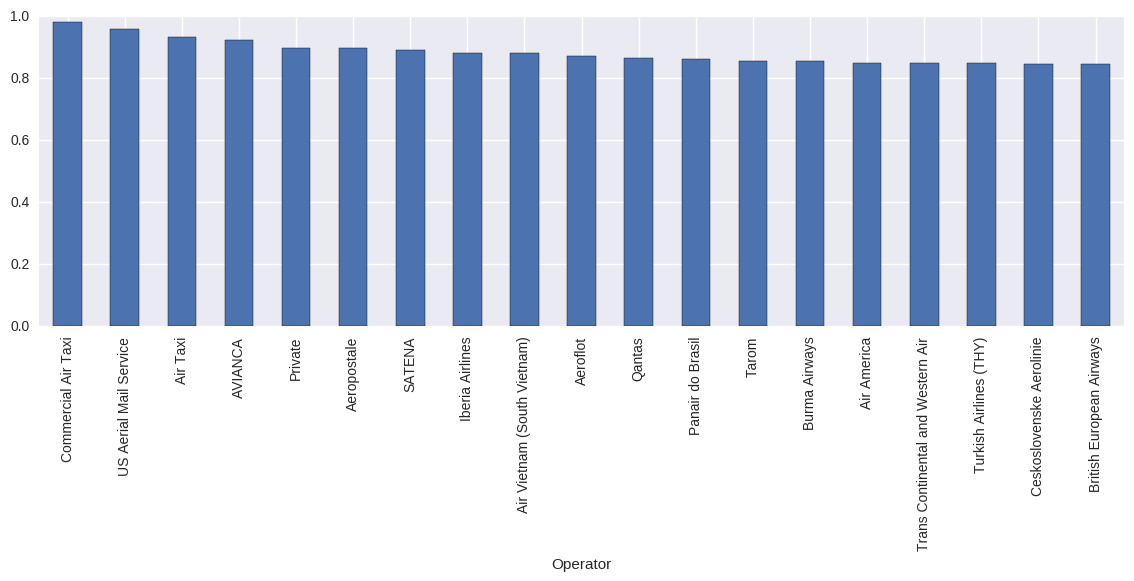

In [273]:
fr = apc.groupby('Operator').agg(['mean','count'])
fr.loc[fr[('fr','count')]>10][('fr','mean')].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

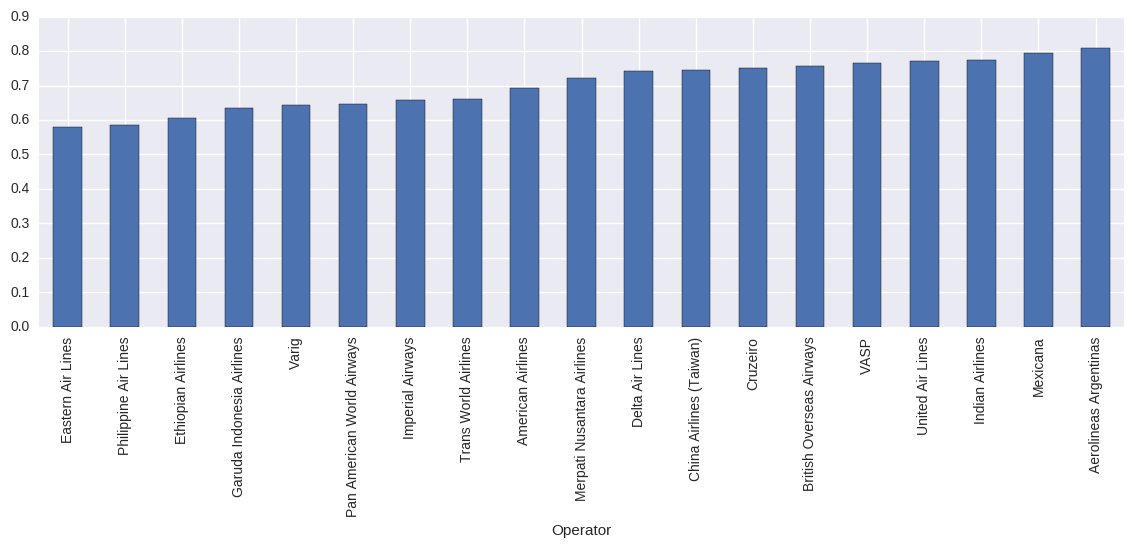

In [274]:
# Airlines with more than 10 crashes but lowest fatality rate
fr = apc.groupby('Operator').agg(['mean','count'])
fr.loc[fr[('fr','count')]>10][('fr','mean')].sort_values(ascending=True)[0:19].plot(kind='bar',figsize=(14,4));

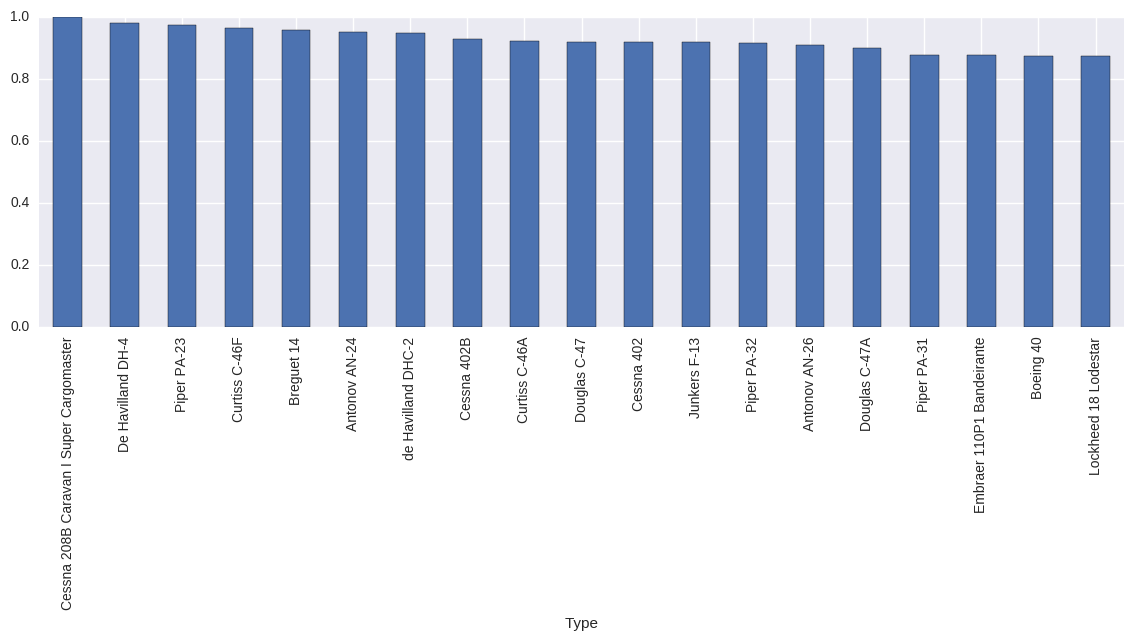

In [275]:
# Fatality rate by airplane type
fr = apc.groupby('Type').agg(['mean','count'])
#fr = apc.groupby('Type').agg({'Fatalities': ['std','mean'], 'Aboard': 'mean'})
#fr
fr.loc[fr[('fr','count')]>10][('fr','mean')].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

In [276]:
# Most Significant Disasters
apc.sort_values('Fatalities',ascending=False)[0:19]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Weekday,Hour,fr
2963,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an ext...,1977,Sunday,17.0,0.905280
3568,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,520.0,0.0,"The aircraft suffered an aft pressure bulkhead failure at 23,900 ft. The aircraft had severe con...",1985,Monday,18.0,0.992366
4455,1996-11-12,18:40,"Near Charkhidadri, India",Saudi Arabian Airlines / Kazastan Airlines,763/1907,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,HZAIH/UN-76435,22748/555/1023413428,349.0,349.0,0.0,Midair collision 17 km W of New Delhi. The Saudi 747 had just taken off from New Delhi airport ...,1996,Tuesday,18.0,1.000000
2726,1974-03-03,11:41,"Near Ermenonville, France",Turkish Airlines (THY),981,Paris - London,McDonnell Douglas DC-10-10,TC-JAV,46704/29,346.0,346.0,0.0,"The aircraft crashed shortly after takeoff from Orly Airport in Paris, France. Climbing through ...",1974,Sunday,11.0,1.000000
3562,1985-06-23,07:15,"AtlantiOcean, 110 miles West of Ireland",Air India,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329.0,329.0,0.0,The aircraft broke up in flight and crashed into the ocean. Detonation of an explosive device in...,1985,Sunday,7.0,1.000000
3240,1980-08-19,19:08,"Near Riyadh, Saudi Arabia",Saudi Arabian Airlines,163,Riyadh - Jeddah,Lockheed 1011-200 TriStar,HZ-AHK,1169,301.0,301.0,0.0,The flight experienced a fire in the aft cargo compartment 6 minutes after taking off from Rily...,1980,Tuesday,19.0,1.000000
3775,1988-07-03,10:55,"Over the Persian Gulf, near Bandar Abbas, Iran",Iran Air,655,Bandar Abbas - Dubai,Airbus A300B2-203,EP-IBU,186,290.0,290.0,0.0,The civilian Iranian airliner was shot down by the U.S. Navy vessel U.S.S. Vincennes with surfac...,1988,Sunday,10.0,1.000000
3137,1979-05-25,15:04,"Chicago O'Hare, Illinois",American Airlines,191,"Chicago, IL- Los Angeles, CA",McDonnell Douglas DC-10-10,N110AA,46510/22,271.0,271.0,2.0,"During takeoff just, as the plane lifted from the runway, the left engine and pylon separated fr...",1979,Friday,15.0,1.000000
3436,1983-09-01,18:26,"Near Sakhalin Island, Russia",Korean Airlines,007,Anchorage - Seoul,Boeing B-747-230B,HL-7442,20559/186,269.0,269.0,0.0,"On a flight from Alaska to South Korea, the airliner drifted off course and twice penetrated Sov...",1983,Thursday,18.0,1.000000
4249,1994-04-26,20:16,"Near Komaki, Aichi, Japan",China Airlines (Taiwan),140,Taipe - Nagoya,Airbus A300B4-622R,B-1816,580,271.0,264.0,0.0,"While on ILS approach to Nagoya Airport, at an altitude of 1,000 feet, the first officer inadver...",1994,Tuesday,20.0,0.974170


In [277]:
# Build a BOW model for 
apc.dropna(subset=['Summary'],inplace=True)
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(stop_words='english')
x = v.fit_transform(apc['Summary'])

In [284]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [50,70,100,150]
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

 

Automatically created module for IPython interactive environment
For n_clusters = 50 The average silhouette_score is : 0.0177456996967
For n_clusters = 70 The average silhouette_score is : 0.0181191073095
For n_clusters = 100 The average silhouette_score is : 0.0221321642244
For n_clusters = 150 The average silhouette_score is : 0.0236048948074


In [233]:
len(apc)

4131

In [400]:
NUM_CLUSTERS=120
from sklearn.cluster import KMeans
from sklearn import metrics

from time import time
t0 = time()
km = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', max_iter=300, n_init=1,
                verbose=True)
km.fit(x)
print("done in %0.3fs" % (time() - t0))

Initialization complete
Iteration  0, inertia 5537.959
Iteration  1, inertia 3413.714
Iteration  2, inertia 3379.863
Iteration  3, inertia 3359.161
Iteration  4, inertia 3345.450
Iteration  5, inertia 3335.569
Iteration  6, inertia 3329.457
Iteration  7, inertia 3325.858
Iteration  8, inertia 3323.901
Iteration  9, inertia 3322.905
Iteration 10, inertia 3322.440
Iteration 11, inertia 3322.110
Iteration 12, inertia 3321.898
Iteration 13, inertia 3321.715
Iteration 14, inertia 3321.659
Iteration 15, inertia 3321.642
Iteration 16, inertia 3321.621
Iteration 17, inertia 3321.601
Iteration 18, inertia 3321.581
Iteration 19, inertia 3321.557
Iteration 20, inertia 3321.532
Converged at iteration 20
done in 2.918s


In [401]:
len(km.labels_)

4131

In [402]:
apc['cluster'] = km.labels_

In [403]:
apc.groupby('cluster').agg('size').sort_values(ascending=False)[0:9]

cluster
23    279
22    202
7     106
29     98
91     92
72     91
46     84
3      83
10     83
dtype: int64

In [404]:
def print_full(x,col):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_colwidth', col)
    print(x)
    pd.reset_option('display.max_rows')
ap1 = apc.sort_values(by='cluster').loc[apc['cluster']==3,['Summary']]
print_full(ap1,100)

                                                                                                  Summary
3531  The aircraft crashed into a mountain at 8,500 ft. while descending to land at Buga. Continued VF...
2501  The sightseeing plane crashed in rain/snow.  Continued VFR flight into adverse weather condition...
1827  Crashed in poor weather conditions while on final approach. Continued VFR flight into adverse we...
2861                        Crashed into mountains. Continued VFR flight into adverse weather conditions.
2011  The plane crashed while en route. Flight on an prohibited route in adverse weather. Flight VFR i...
2131  Collided with trees in rain and fog while en route. Continued VFR flight into adverse weather co...
3255  The aircraft crashed into a mountain at 9,500 ft. while descending to land. Continued VFR flight...
2051                Collided with trees in rain and fog after VFR flight into adverse weather conditions.
2815                     Continued VFR flight 

In [386]:
apc['desc']=''
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [405]:
# Try to give each cluster a name?
from tqdm import tqdm
for cluster_number in tqdm(range(0,NUM_CLUSTERS)):
    ap1 = apc.loc[apc['cluster']==cluster_number,['Summary']]
    ap1['Summary2']= ap1['Summary'].apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))
    description = ' '.join(pd.Series(' '.join(ap1['Summary2']).lower().split()).value_counts()[:100][0:9].index.tolist())
    apc.loc[apc['cluster']==cluster_number,['desc']]=description


100%|██████████| 120/120 [00:02<00:00, 43.92it/s]


In [406]:
apc

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Weekday,Hour,fr,cluster,desc
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, ...",1913,Wednesday,NaN,1.000000,63,midair collision atc two occurred thirteen one seven killed
22,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from the plane to his death as the plane began to go int...,1919,Sunday,NaN,1.000000,61,caught plane fire. crashed fire pilot aircraft taking landing
40,1920-10-05,NaN,"Valencia, Spain",Latecoere Airlines,NaN,NaN,Breguet 14,F-ALTA,20,2.0,2.0,0.0,Crashed while landing.,1920,Tuesday,NaN,1.000000,31,landing crashed gear aircraft landing. plane runway pilot failure
43,1920-12-14,NaN,"Cricklewood, England",Handley Page Transport,NaN,NaN,Handley Page HP-16,G-EAMA,HP-25,8.0,4.0,0.0,Crashed into a tree on take off in fog.,1920,Tuesday,NaN,0.500000,24,crashed fog. mountain fog heavy rain take ground time.
56,1921-09-06,NaN,"Paris, France",Franco-Roumaine,NaN,Varsovie - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,5.0,0.0,Crashed while making an approach to Le Bourget Airport in Paris.,1921,Tuesday,NaN,1.000000,112,"crashed field bourget airport. landings. le practicing yards windmill,"
58,1922-01-14,NaN,"Paris, France",Handley Page Transport,NaN,NaN,Handley Page O/10,G-EATN,HP-43,5.0,5.0,5.0,Crashed at Le Bourget field.,1922,Saturday,NaN,1.000000,112,"crashed field bourget airport. landings. le practicing yards windmill,"
60,1922-04-07,NaN,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,NaN,NaN,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4,7.0,7.0,0.0,"A midair collision occurred in poor visibility approximately 18 miles north of Beauvais, France....",1922,Friday,NaN,1.000000,75,midair killed collision aircraft cessna aboard avoid collision. two
88,1924-12-24,NaN,"Purley, England",Imperial Airways,NaN,NaN,de Havilland DH-34B,G-EBBX,36,8.0,8.0,0.0,"Shortly after taking off, witnesses observed a puff of white smoke after which the plane nose-di...",1924,Wednesday,NaN,1.000000,11,fuel crashed aircraft due forced flight plane starvation. lost
92,1925-06-25,NaN,"Landrécies, France",KLM Royal Dutch Airlines,NaN,NaN,Fokker (KLM) F.III,H-NABM,KLM-2,4.0,4.0,0.0,Crashed in poor weather.,1925,Thursday,NaN,1.000000,16,poor crashed weather weather. mountain aircraft approach plane crew
102,1926-07-03,NaN,"Rossaugpt, Czechoslovakia",Compagnie Internationale de Navigation Aérienne,NaN,Paris - Prague,Caudron C-61,F-AFBT,5307,7.0,7.0,0.0,Crashed while en route.,1926,Saturday,NaN,1.000000,10,en route. crashed mountain route disappeared aircraft never found.


In [407]:
# Number of Fatalities by cluster
apc.groupby('cluster').agg({'Fatalities':'mean'}).sort_values(by='Fatalities',ascending=False)[0:9]

,Fatalities
cluster,
30,74.800000
92,68.166667
63,62.800000
43,54.500000
93,47.928571
111,44.375000
86,41.555556
119,37.166667
0,35.857143


In [408]:
ap1 = apc.sort_values(by='cluster').loc[apc['cluster']==71,['Summary']]
pd.set_option('display.max_colwidth', 3000)
ap1

,Summary
913,"After two or three failed approaches, the plane struck trees and crashed into a field. Poor judgment on the part of the pilot attempting to land in VFR conditions in limited visibility and poor weather conditions and not diverting to another airport."
910,"The aircraft lost control and crashed just after taking off. The captain losing control in conditions of poor visibility, resulted in the aircraft flying into the ground. The loss of control was most likely caused by inadequate illumination of the flying instruments due to faults in the lighting system. Decision to take off in poor weather conditions and faulty lighting system."
3346,Crashed into a mountain during poor weather conditions.
1552,"The aircraft crashed 1,450 feet short of the runway while on approach. Poor judgement and technique by the pilot during approach in poor weather conditions."
3670,Ditched into the sea in poor weather conditions.
2035,Undershot the runway and struck a concrete obstruction in poor weather conditions. Lack of information supplied to the pilot regarding the true conditions of surface visibility which was below the minimum prescribed for a night landing. Lack of proper monitoring and possibly incorrect setting of altimeters during the approach to land. The use of landing lights which resulted in glare during the final stages of the approach in foggy conditions
3987,The plane made a forced landing during poor weather conditions and crashed into trees on a ridge. All passengers survived but one elderly passenger died while waiting for rescue.
1032,Crashed into a mountainside while circling to land. Crew error. Lack of flight discipline. Poor decision by Chief of Operations in allowing the aircraft to continue flight in poor weather conditions.
2065,Pilot obtained special VFR clearance. Took off in IFR weather. Encounter forcasted thunderstorms. Inflight break-up of aircraft after separation of elevator. Pilot exercised poor judgement in taking off in poor weather conditions.
2080,"Struck mountain at 1,200 ft after flying VFR into adverse weather conditions. Pilot exercised poor judgment. ATC issued conflicting instructions."


In [409]:
# Airline by Cluster
#apc.groupby(['Operator','cluster']).size()
TopOperators = apc['Operator'].value_counts()[0:29].index.tolist()
apc[apc['Operator'].isin(TopOperators)].groupby(['Operator','cluster']).size()

Operator          cluster
AVIANCA           17          1
                  21          2
                  22          1
                  23          2
                  27          1
                  30          1
                  33          1
                  35          2
                  39          1
                  48          1
                  50          1
                  69          1
                  72          1
                  77          1
                  99          4
                  103         1
                  108         1
Aeroflot          0           3
                  4           2
                  5           2
                  7          12
                  8           5
                  10          3
                  11          4
                  12          4
                  16          3
                  17          3
                  18          1
                  19          2
                  20          2
              

In [410]:
ap1 = apc[apc['Operator']=='United Air Lines'].sort_values(by='cluster').loc[apc['cluster']==44,['Summary']]
pd.set_option('display.max_colwidth', 3000)
ap1

,Summary


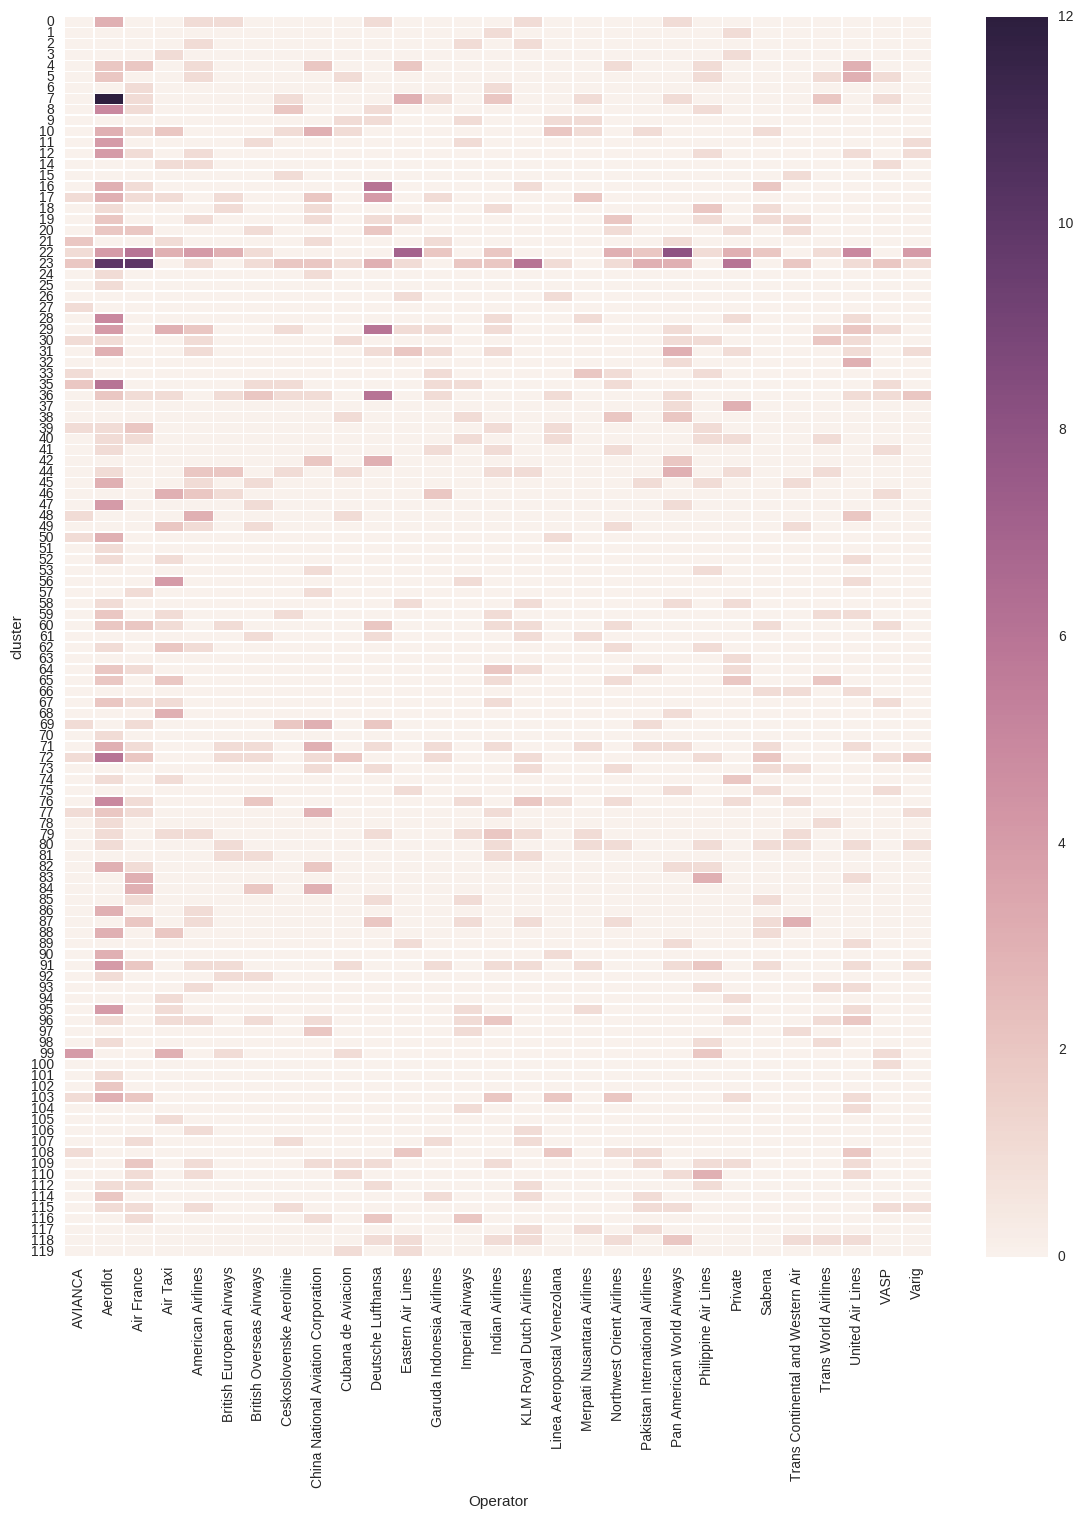

In [411]:
#df.pivot(index='date', columns='variable', values='value')
ap1 = apc[apc['Operator'].isin(TopOperators)].groupby(['Operator','cluster']).size().reset_index()
ap1.columns=['Operator','cluster','size']
ap1 = ap1.pivot(index='cluster', columns='Operator',values='size')
ap1.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(14,16))         # Sample figsize in inches
sns.heatmap(ap1, annot=False, linewidths=.5, ax=ax);

In [421]:
ap1 = apc[apc['Operator']=='Philippine Air Lines'].sort_values(by='cluster').loc[apc['cluster']==110,['Summary']]
pd.set_option('display.max_colwidth', 3000)
ap1

,Summary
2391,"The aircraft was on a flight from Cauayan, Isabela to Manila when it crashed into mountainous terrain after an explosion in the rear lavatory of the aircraft broke off the tail section."
2404,A hand grenade exploded inside the passenger cabin at FL130 . A safe emergency landing was made despite a 9 sq. ft. hole in the fuselage.
2820,A bomb exploded in the right rear lavatory causing a hole in the fuselage. The plane landed safely.


In [416]:
ap1 = apc.loc[apc['cluster']==110,['desc']][0:1]
ap1

,desc
1022,bomb crashed exploded passenger plane rear believed flight explosion
